In [1]:
import pandas as pd
names=["Class","Alcohol","Malic_acid","Ash","Alcalinity_of_ash","Magnesium","Total_phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","OD280","Proline "]
df=pd.read_csv("wine.data",sep=",",names=names)
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.shape

(178, 14)

This is the third dataset about wine that I encountered. In the previous two datasets, high quality wines had high percentage of alcohol. Let's see if this is the case in this dataset as well.

In [3]:
df_1=df[df["Class"]==1]
df_2=df[df["Class"]==2]
df_3=df[df["Class"]==3]

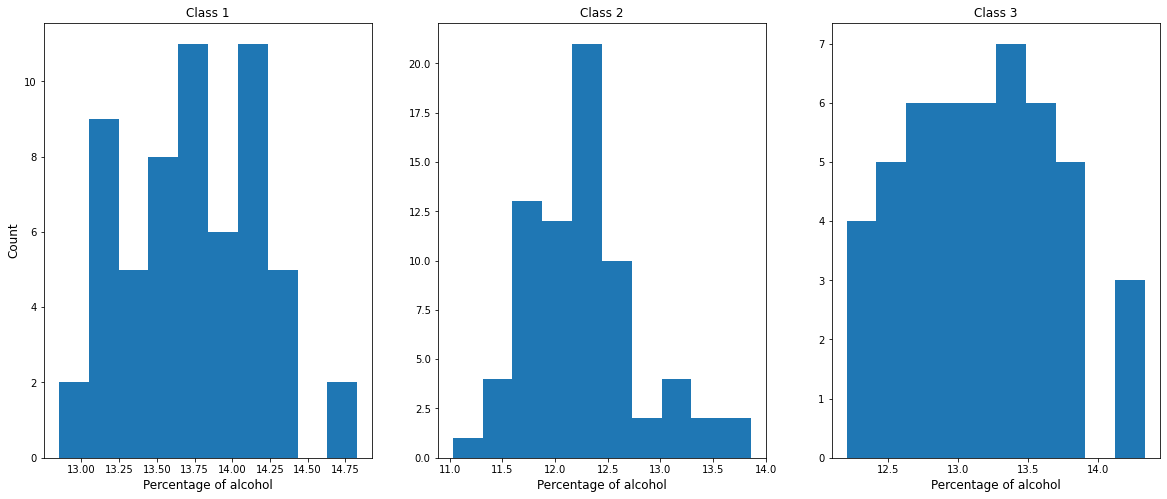

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8)) 

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 3 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

ax0.hist(df_1["Alcohol"])
ax0.set_title("Class 1",fontsize=12)
ax0.set_xlabel("Percentage of alcohol",fontsize=12)
ax0.set_ylabel("Count",fontsize=12)

ax1.hist(df_2["Alcohol"])
ax1.set_title("Class 2",fontsize=12)
ax1.set_xlabel("Percentage of alcohol",fontsize=12)

ax2.hist(df_3["Alcohol"])
ax2.set_title("Class 3",fontsize=12)
ax2.set_xlabel("Percentage of alcohol",fontsize=12)

plt.show()

In [5]:
count_1=df_1[df_1["Alcohol"]>=14]
print("The number of Class 1 wine with percentage of alcohol above 14 is: ", len(count_1))

count_2=df_2[df_2["Alcohol"]>=14]
print("The number of Class 2 wine with percentage of alcohol above 14 is: ", len(count_2))

count_3=df_3[df_3["Alcohol"]>=14]
print("The number of Class 3 wine with percentage of alcohol above 14 is: ", len(count_3))

The number of Class 1 wine with percentage of alcohol above 14 is:  19
The number of Class 2 wine with percentage of alcohol above 14 is:  0
The number of Class 3 wine with percentage of alcohol above 14 is:  3


It appears that this dataset confirms the findings in the previous two wine datasets that higher quality wines have higher percentage of alcohhol.

Let's see if there is any exceptionally good or bad wines in this dataset.

In [6]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(random_state=0).fit(df)
outlier_label=pd.DataFrame(clf.predict(df))
outlier_label=outlier_label.rename(columns={0:"outlier_label"})
outlier_label

,outlier_label
0,1
1,1
2,1
3,1
4,1
...,...
173,1
174,1
175,1
176,1


In [7]:
df_labeled=pd.concat([df,outlier_label],axis=1)
outliers=df_labeled[df_labeled["outlier_label"]==-1].drop(["outlier_label"],axis=1)
outliers

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
74,2,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
115,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407


There is one exceptionally good wine that is a member of Class 1.

Let's processing the data to model-building now.

In [8]:
df.groupby("Class").count().T

Class,1,2,3
Alcohol,59,71,48
Malic_acid,59,71,48
Ash,59,71,48
Alcalinity_of_ash,59,71,48
Magnesium,59,71,48
Total_phenols,59,71,48
Flavanoids,59,71,48
Nonflavanoid_phenols,59,71,48
Proanthocyanins,59,71,48
Color_intensity,59,71,48


Class distributions are quite even. We are not going to do any re-balancing.

Separate the predictor variables and target variable.

In [9]:
X=df.drop(["Class"],axis=1)
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
y=df[["Class"]]
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


Standardize the predictor variables.

In [12]:
from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=names)
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Determine the optimal number of features to use.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import numpy as np

estimator=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(8),scoring="accuracy")
features.fit(X, np.asarray(y).reshape(y.shape[0],))

print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 8


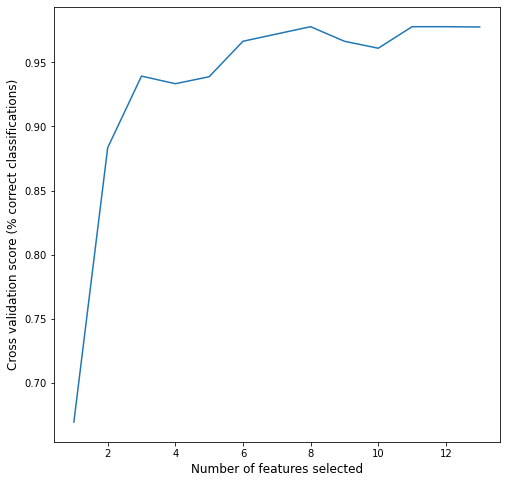

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.xlabel("Number of features selected",fontsize=12)
plt.ylabel("Cross validation score (% correct classifications)",fontsize=12)
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

In [17]:
from sklearn.feature_selection import RFE
import numpy as np
selector = RFE(estimator, n_features_to_select=features.n_features_, step=1)
selector = selector.fit(X, np.asarray(y).reshape(y.shape[0],))
selector=pd.DataFrame(selector.ranking_).rename(columns={0:"Importance"})
selector

,Importance
0,1
1,3
2,5
3,2
4,1
5,1
6,1
7,6
8,4
9,1


In [18]:
features=selector[selector["Importance"]==1]
X=X.iloc[:,features.index]
X.head()

,Alcohol,Magnesium,Total_phenols,Flavanoids,Color_intensity,Hue,OD280,Proline
0,1.518613,1.913905,0.808997,1.034819,0.251717,0.362177,1.847920,1.013009
1,0.246290,0.018145,0.568648,0.733629,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.088358,0.808997,1.215533,0.269020,0.318304,0.788587,1.395148
3,1.691550,0.930918,2.491446,1.466525,1.186068,-0.427544,1.184071,2.334574
4,0.295700,1.281985,0.808997,0.663351,-0.319276,0.362177,0.449601,-0.037874


Split the dataset into train and test subsets.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape)
print(X_test.shape)

(151, 8)
(27, 8)


In [20]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 150, cv = 7, verbose=2, n_jobs = -1)

In [22]:
rf_random.fit(X_train,y_train)

Fitting 7 folds for each of 150 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed: 16.3min finished
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=7,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=0),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                 

In [23]:
rf_random.best_params_

{'n_estimators': 555,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [38]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test data : ",accuracy_score(y_test,y_pred))

Accuracy on test data :  1.0


Confusion matrix, without normalization
[[ 9  0  0]
 [ 0 11  0]
 [ 0  0  7]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


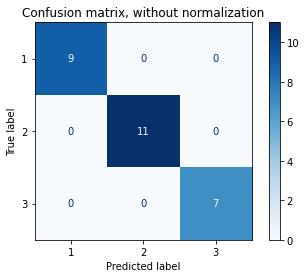

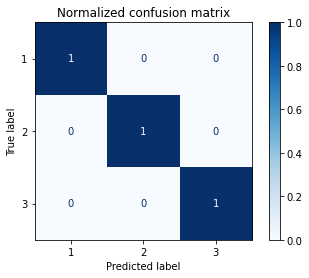

In [39]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_random, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()